<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/05_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. MACHINE LEARNING

## 5.1 Loyiha qadamlari
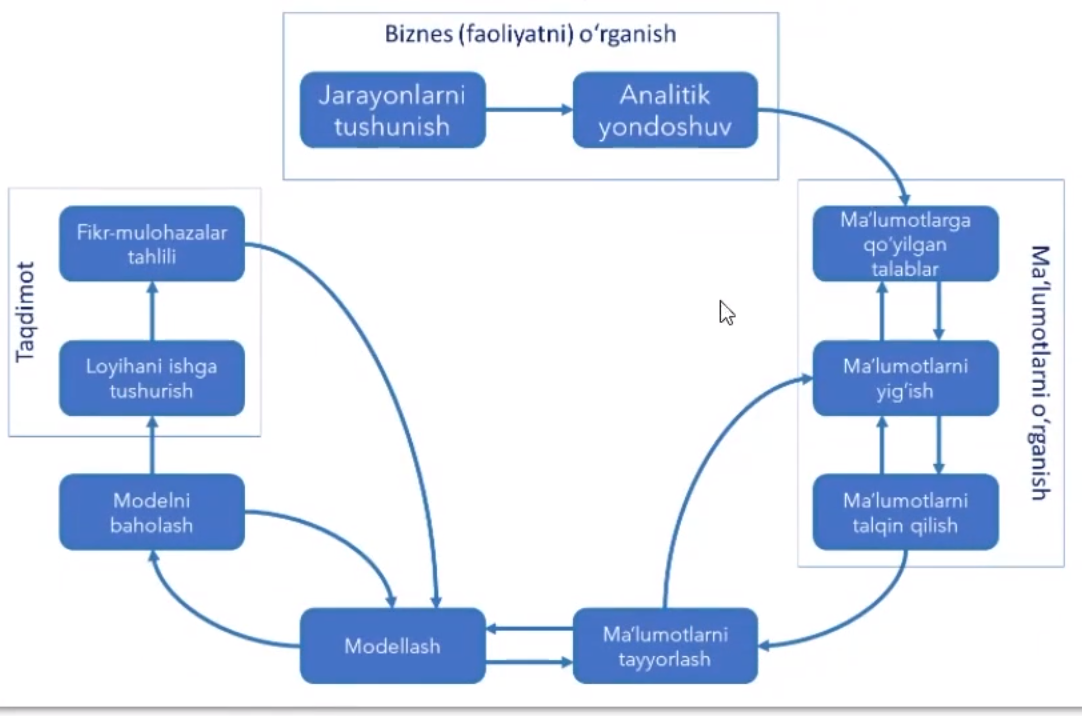



In [ ]:
import pandas as pd
import numpy as np
import sklearn  # scikit-leaarn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'http://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


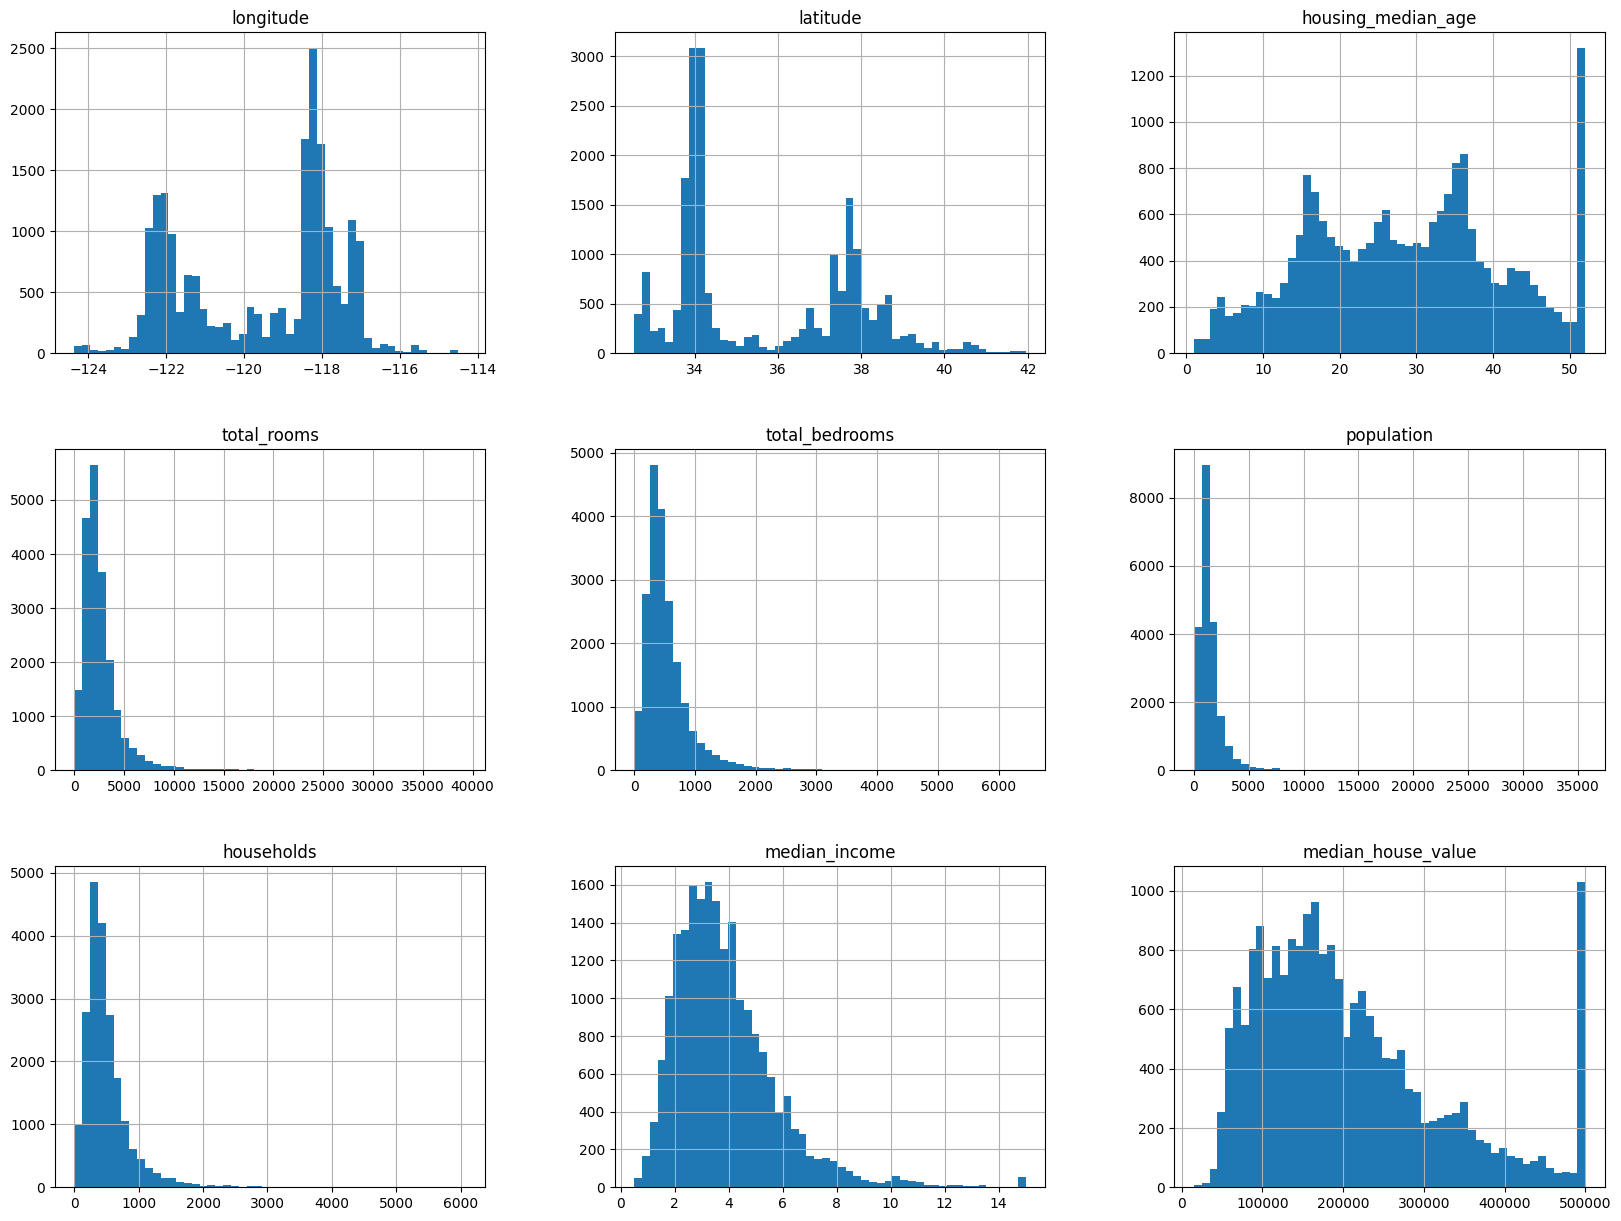

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

#Ma’lumotlarni o’rganish. Train va test set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=30)

In [ ]:
train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
7686,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,186100.0,<1H OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND
1906,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333,121400.0,INLAND
13556,-117.31,34.10,28.0,2899.0,755.0,2406.0,655.0,1.5208,69500.0,INLAND
9630,-121.00,37.26,45.0,1750.0,371.0,847.0,354.0,1.7062,77400.0,INLAND
18912,-122.24,38.15,10.0,6817.0,1188.0,4163.0,1135.0,4.4529,144100.0,NEAR BAY
2185,-119.98,36.74,26.0,1453.0,251.0,896.0,260.0,3.4861,112500.0,INLAND


In [ ]:
test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19449,-121.03,37.68,20.0,3204.0,625.0,2016.0,605.0,2.6567,110400.0,INLAND
10452,-117.66,33.46,26.0,2073.0,370.0,952.0,340.0,5.0877,288100.0,<1H OCEAN
18982,-122.01,38.26,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0,INLAND
8187,-118.11,33.78,16.0,3985.0,567.0,1327.0,564.0,7.9767,500001.0,<1H OCEAN
15759,-122.44,37.77,52.0,2994.0,736.0,1428.0,700.0,3.0766,438900.0,NEAR BAY
18144,-122.04,37.35,28.0,3250.0,485.0,1328.0,473.0,7.4729,431600.0,<1H OCEAN
887,-121.99,37.55,16.0,6647.0,2098.0,4649.0,1903.0,2.9074,213800.0,<1H OCEAN
20103,-120.35,37.98,4.0,1658.0,301.0,676.0,278.0,3.5714,149500.0,INLAND
6990,-118.04,33.97,25.0,2945.0,914.0,2313.0,832.0,2.5686,177500.0,<1H OCEAN
16240,-121.29,37.99,41.0,930.0,191.0,463.0,185.0,3.4141,90600.0,INLAND


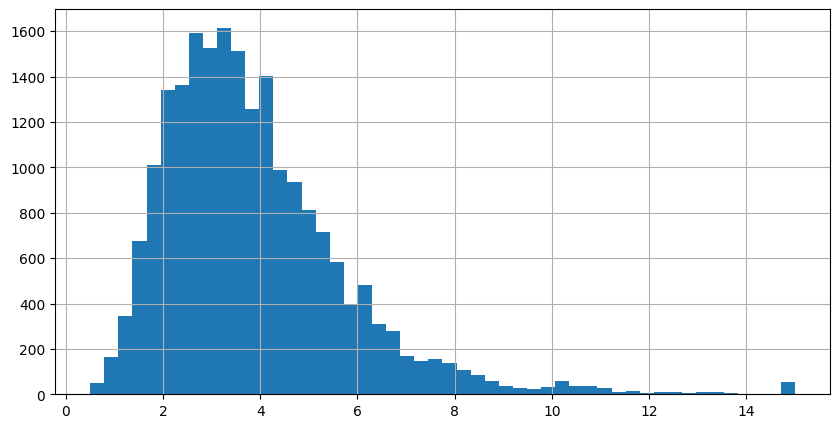

In [ ]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(10,5))
plt.show()

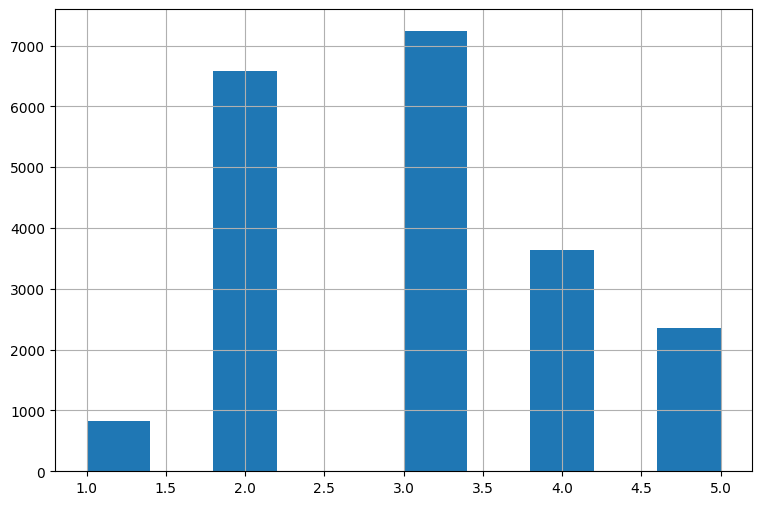

In [ ]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:
df.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
2644,-124.14,40.58,25.0,1899.0,357.0,891.0,355.0,2.6987,92500.0,<1H OCEAN,2
7165,-118.17,34.05,35.0,1256.0,294.0,2990.0,302.0,3.1528,121800.0,<1H OCEAN,3
10670,-117.86,33.62,17.0,2975.0,371.0,1247.0,398.0,10.1989,500001.0,<1H OCEAN,5
17256,-119.70,34.42,43.0,1802.0,557.0,1490.0,538.0,2.6750,247900.0,<1H OCEAN,2


#Balansni saqlagan holda categorylarga ko'ra train va test setlarga ajratish (StratifiedShuffleSplit)
Masalan: ma'lumotlar ichida erkaklar haqida 60 % va ayollar haqida 40 % ma'lumot bo'lsa, train va test setga bir xil ulushlarda ma'lumot ajratish uchun dastlab categorylarga ajratib olinadi keyin esa o'sha categoryga ko'ra ma'lumotlar taqsimlanadi

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index, test_index in stratified_split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
strat_train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3835,-118.43,34.19,27.0,3440.0,739.0,1827.0,712.0,4.1250,245500.0,<1H OCEAN,3
11955,-117.45,33.91,29.0,2320.0,422.0,1358.0,415.0,3.7333,121400.0,INLAND,3
16503,-121.13,37.74,28.0,409.0,104.0,244.0,98.0,3.4643,90900.0,INLAND,3
19971,-119.11,36.21,10.0,1972.0,455.0,1469.0,442.0,1.5407,58400.0,INLAND,2
1586,-121.96,37.85,10.0,3209.0,379.0,1199.0,392.0,12.2478,500001.0,INLAND,5
10542,-117.71,33.47,17.0,2681.0,454.0,830.0,410.0,5.5507,345700.0,<1H OCEAN,4
20233,-119.29,34.24,27.0,4742.0,775.0,1682.0,696.0,6.1940,500001.0,NEAR OCEAN,5
6726,-118.11,34.12,52.0,2954.0,371.0,1152.0,347.0,11.5609,500001.0,<1H OCEAN,5
14137,-117.05,32.74,34.0,2178.0,455.0,1193.0,446.0,3.1719,115300.0,NEAR OCEAN,3
387,-122.29,37.89,52.0,2248.0,422.0,870.0,377.0,3.4732,246200.0,NEAR BAY,3


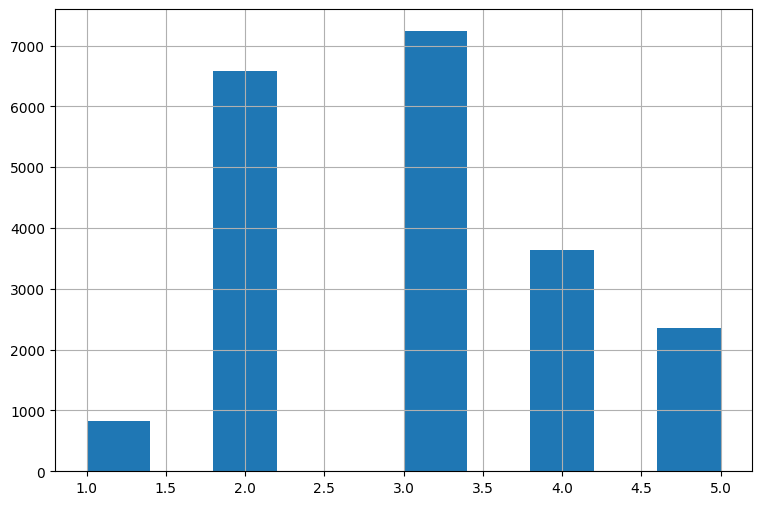

In [ ]:
df['income_cat'].hist(figsize=(9,6))
plt.show()

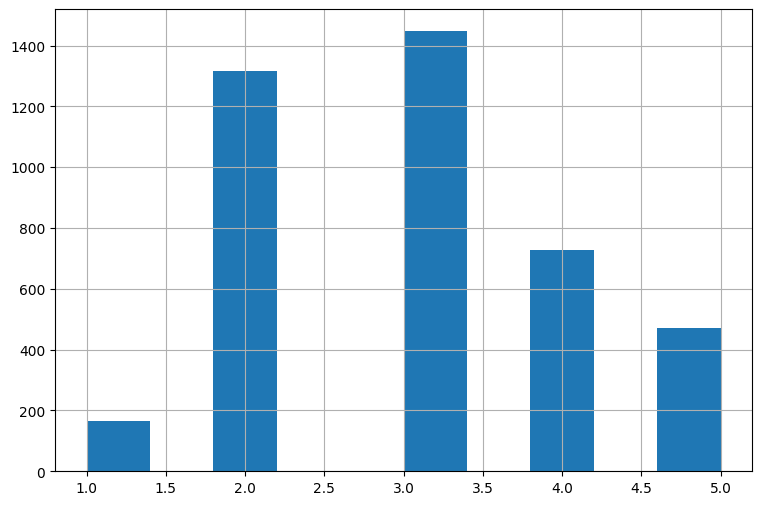

In [ ]:
strat_test_set['income_cat'].hist(figsize=(9,6))
plt.show()

# Categorylarga ajratish uchun yaratilgan ustunni tashlab yuborish

In [ ]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3835,-118.43,34.19,27.0,3440.0,739.0,1827.0,712.0,4.1250,245500.0,<1H OCEAN
11955,-117.45,33.91,29.0,2320.0,422.0,1358.0,415.0,3.7333,121400.0,INLAND
16503,-121.13,37.74,28.0,409.0,104.0,244.0,98.0,3.4643,90900.0,INLAND
19971,-119.11,36.21,10.0,1972.0,455.0,1469.0,442.0,1.5407,58400.0,INLAND
1586,-121.96,37.85,10.0,3209.0,379.0,1199.0,392.0,12.2478,500001.0,INLAND


<img src="https://www.nationsonline.org/maps/USA/California_map.jpg"
alt="California" width="600"/>

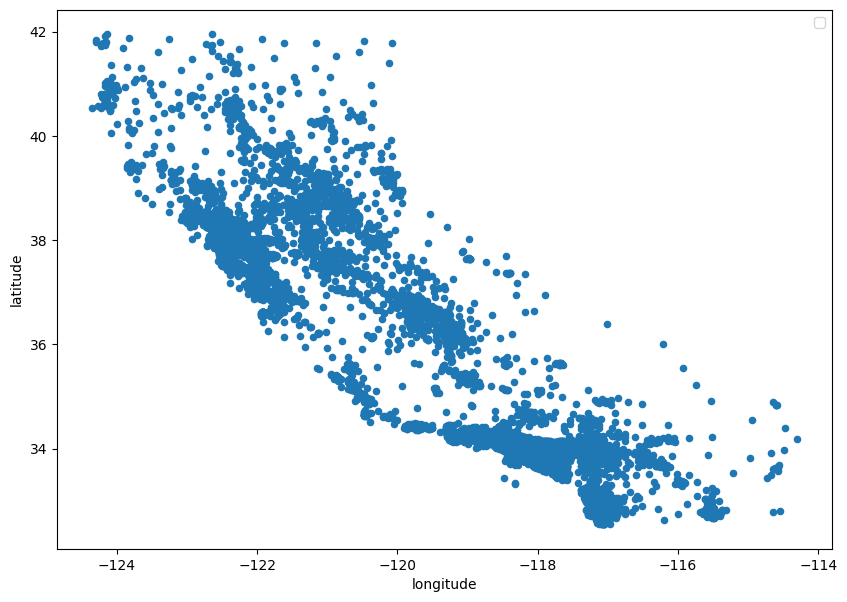

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude',figsize=(10,7))
plt.legend()
plt.show()

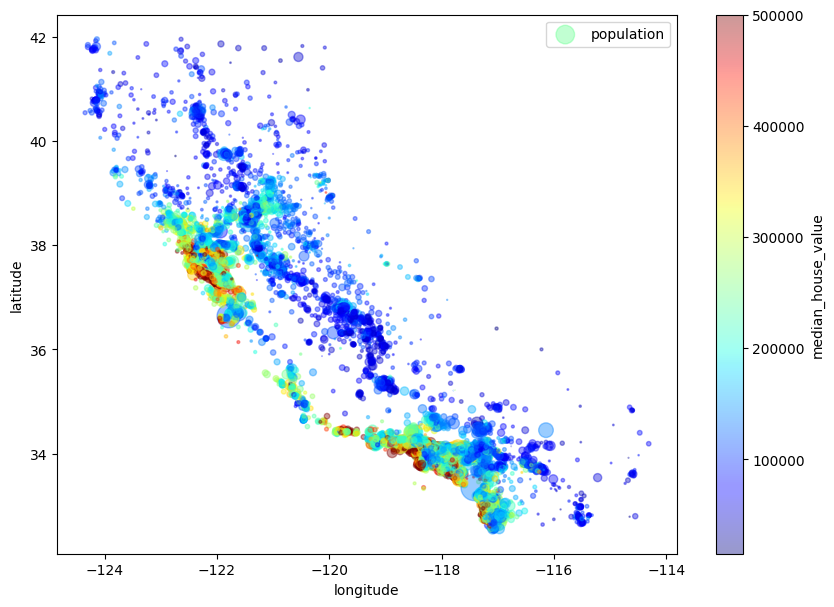

In [ ]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             alpha=0.4,
             s=housing['population']/100,  # nuqta radiusi aholi soniga qarab o'zgaradi
             label='population',  # nuqta rangi uyning median narxiga qarab o'zgaradi
             figsize=(10,7),
             c='median_house_value',
             cmap='jet',  # ranglar. ko'k-daromadi kam, qizil-daromadi ko'p
             colorbar=True)
plt.legend()
plt.show()

# Korrelyatsiya

In [ ]:
housing.corrwith(housing['median_house_value'], numeric_only=True).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690500
total_rooms           0.133925
housing_median_age    0.101353
households            0.063882
total_bedrooms        0.047485
population           -0.022558
longitude            -0.046643
latitude             -0.144072
dtype: float64

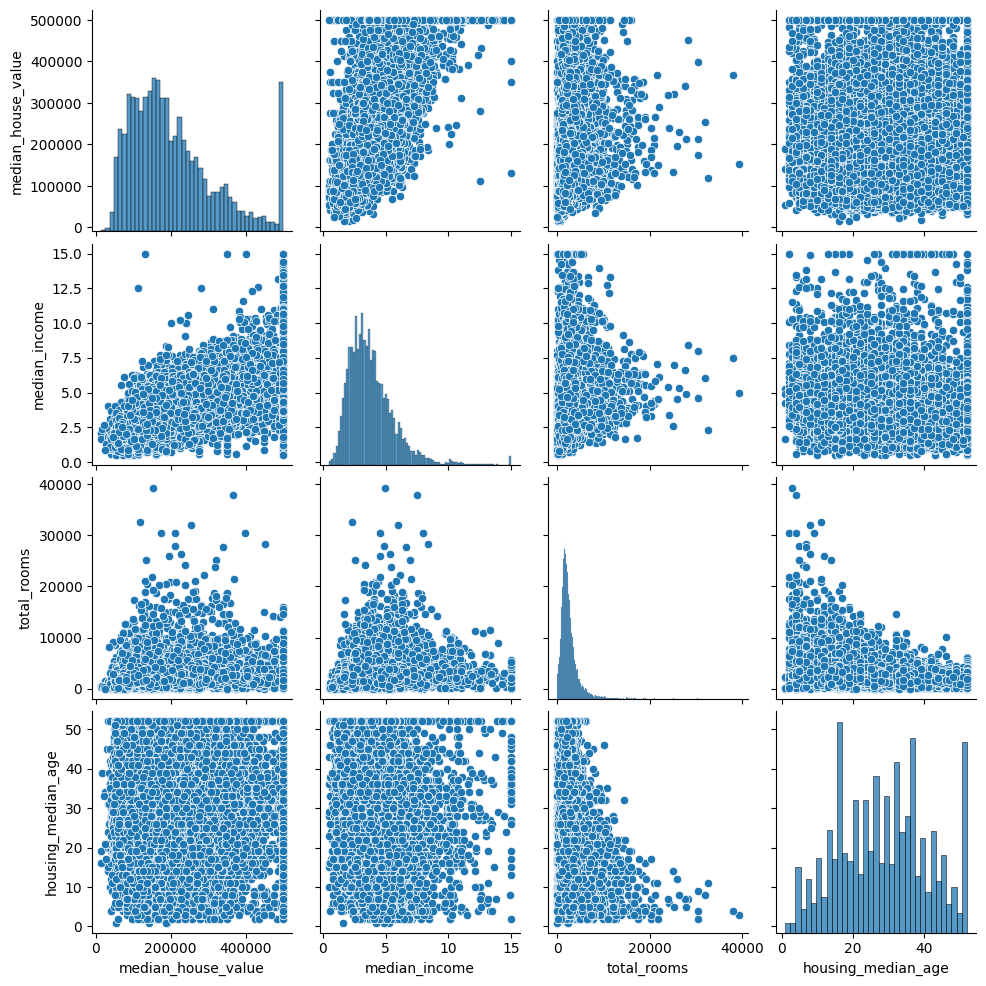

In [ ]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[cols])
plt.show()

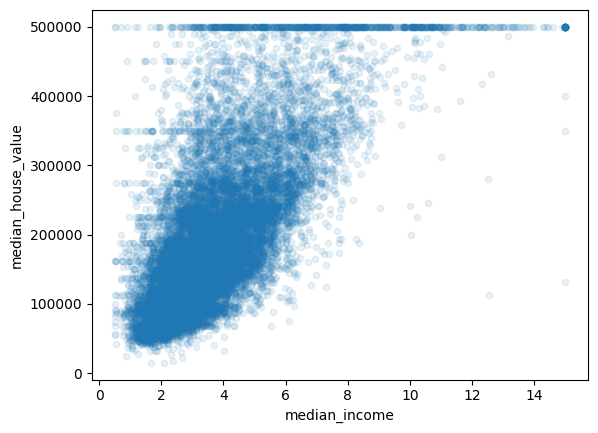

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

# Korrelyatsiya uchun mavjud qiymatlardan yangi ustunlar yaratish

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']  # har bir oilaga to'g'ri keladigan xonalar soni
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']   # har bir xonaga to'g'ri keladigan yotoqxona
housing['population_per_household'] = housing['population']/housing['households']  # aholi zichligi

In [ ]:
housing.corrwith(housing['median_house_value'], numeric_only=True).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690500
rooms_per_household         0.156798
total_rooms                 0.133925
housing_median_age          0.101353
households                  0.063882
total_bedrooms              0.047485
population                 -0.022558
population_per_household   -0.031648
longitude                  -0.046643
latitude                   -0.144072
bedrooms_per_room          -0.263216
dtype: float64

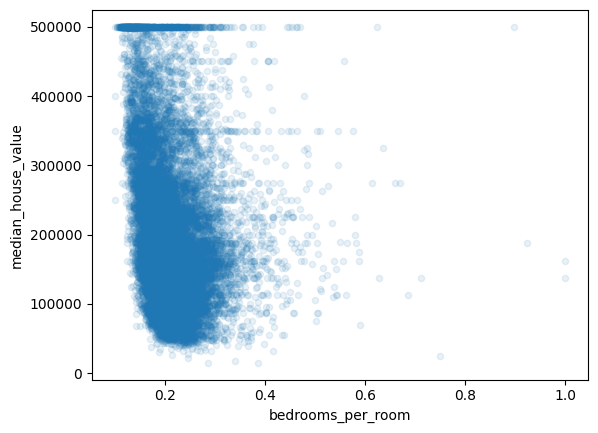

In [ ]:
housing.plot(kind='scatter', x='bedrooms_per_room', y='median_house_value', alpha=0.1)
plt.show()